<a href="https://colab.research.google.com/github/g-roger/deep-learning/blob/master/03_PSE_Demo2_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Power Skill Extensions - Leading Technology Transformation - Applied Machine Learning - Convolutional Neural Networks (CNNs)

##Exercício de fixação III - Convolutional Neural Networks usando Keras e CIFAR-10

### Profs. Ahirton Lopes, Felipe Teodoro e Vinicius Soares

### Carregando a base CIFAR-10 (imagens rotuladas em macro categorias)

*** Mais informações em https://www.cs.toronto.edu/~kriz/cifar.html ***

In [ ]:
import keras
from keras.datasets import cifar10

# carregando o dataset pré-randomizado de treinamento bem como os dados de teste

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


## Visualizando as primeiras 24 imagens do dataset de treinamento

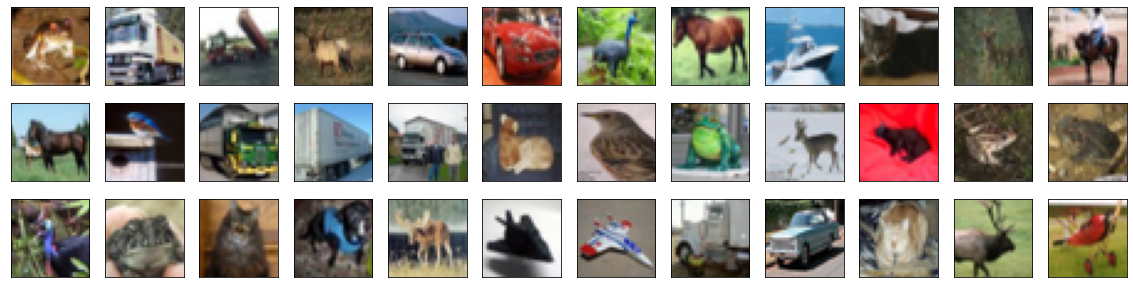

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))


## Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [ ]:
# redimensionamento [0,255] --> [0,1]

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Dividindo o dataset em treinamento, teste e validação

In [ ]:
from keras import utils as np_utils

# "one-hot encoding" aplicado aos rótulos

num_classes = len(np.unique(y_train))
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

# divindo dataset de treinamento em treinamento, teste e validação

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# impressão da forma do conjunto de treino

print('formato x_train:', x_train.shape)

# impressão do número de imagens nos datasets de treinamento, teste e validação

print(x_train.shape[0], 'amostras de treinamento')
print(x_test.shape[0], 'amostras de teste')
print(x_valid.shape[0], 'amostras de validação')

formato x_train: (45000, 32, 32, 3)
45000 amostras de treinamento
10000 amostras de teste
5000 amostras de validação


## Definindo a arquitetura do modelo (IMPORTANTE!)

* 3 camadas convolucionais de tamanho progressivamente crescente
* Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
* Uma camada do tipo totalmente conectada de 100 neurônios
* Últimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
* "Dropout" de 0,2-0,3

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# tentem com outras funções de ativação!
# mais informações em https://keras.io/activations/

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 128)         0

## Compilando o modelo

In [ ]:
# compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
# mais informações em https://keras.io/losses/
# mais informações em https://keras.io/optimizers/
# mais informações em https://keras.io/metrics/

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

## Treinando o modelo

In [ ]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=64, epochs=10,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

# tentem mudar o número de épocas de treinamento e verificar o comportamento de nosso algoritmo

Epoch 1/10
704/704 - 68s - loss: 1.7379 - accuracy: 0.3669 - val_loss: 1.4642 - val_accuracy: 0.4814

Epoch 00001: val_loss improved from inf to 1.46425, saving model to model.weights.best.hdf5
Epoch 2/10
704/704 - 66s - loss: 1.3770 - accuracy: 0.5076 - val_loss: 1.5137 - val_accuracy: 0.4438

Epoch 00002: val_loss did not improve from 1.46425
Epoch 3/10
704/704 - 67s - loss: 1.2367 - accuracy: 0.5605 - val_loss: 1.1426 - val_accuracy: 0.5932

Epoch 00003: val_loss improved from 1.46425 to 1.14257, saving model to model.weights.best.hdf5
Epoch 4/10
704/704 - 65s - loss: 1.1338 - accuracy: 0.5993 - val_loss: 1.2079 - val_accuracy: 0.5652

Epoch 00004: val_loss did not improve from 1.14257
Epoch 5/10
704/704 - 66s - loss: 1.0645 - accuracy: 0.6274 - val_loss: 1.0746 - val_accuracy: 0.6162

Epoch 00005: val_loss improved from 1.14257 to 1.07461, saving model to model.weights.best.hdf5
Epoch 6/10
704/704 - 66s - loss: 1.0134 - accuracy: 0.6433 - val_loss: 1.2148 - val_accuracy: 0.6056

Ep

## Carregando o modelo com a melhor precisão de validação

In [ ]:
# carregando os pesos que geraram a melhor precisão de validação

model.load_weights('model.weights.best.hdf5')

## Cálculo da precisão de classificação no dataset de testes

In [ ]:
# avaliando e imprimindo a precisão do teste

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', ' Acuracia de Teste:', score[1])


  Acuracia de Teste: 0.6899999976158142


## Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.

In [ ]:
# obtendo previsões no conjunto de testes

y_hat = model.predict(x_test)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

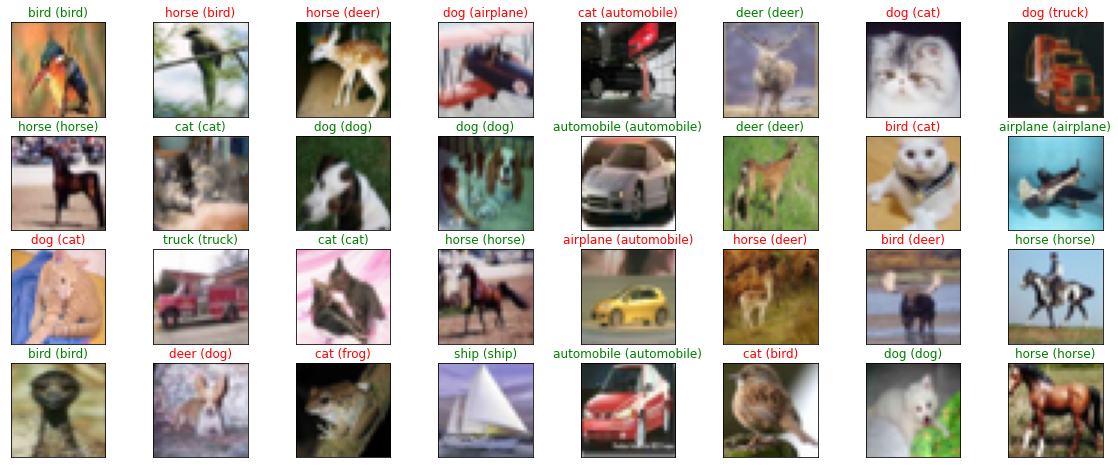

In [ ]:
# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
    # amostras corretamente classificadas em verde e incorretamente classificadas em vermelho
